In [1]:
import numpy as np
import re, copy, sys

import matplotlib.pyplot as plt
%matplotlib inline

# lib/chromatogram.py is the library file
sys.path.append("..")
import chromatics

# how I like my matplotlib formatting
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)  
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

[371.2 371.4 372.2 391.2 339.2 372.4 340.2 349.2 392.2 284.2]


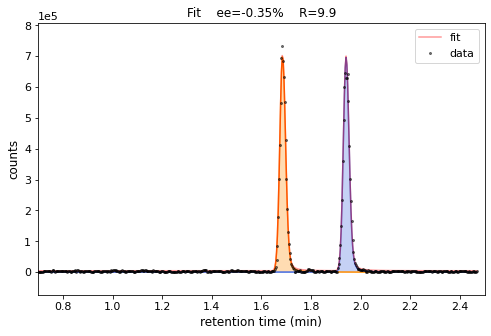

In [2]:
mass = 291.2

c = chromatics.Chromatogram.new_from_csv(
    "test.csv", # path to csv
    x_start=(1,1), # where the x data start (matrix indexing of csv)
    y_start=(2,1), # where the y data start
    label_start=(2,0), # where the y labels start
    peaks=2, # how many peaks to fit
    baseline_corrections=True, # apply constant baseline
    max_len=750, # how many X/Y values to expect (to trim off trailing characters).
)

# optional = fit baseline to a defined region of graph with no peaks. can be omitted, and baseline will be fit normally.
c.fit_baseline(
    label=mass,
    X_min=0.8,
    X_max=1.2,
)

# print Y_labels ordered by most Y signal
print(c.top_labels()[:10])

c.fit_peaks(
    label=mass, # which trace we're going to model
    times=None, # can be a list of retention times for peak centers, or "keep" to keep current times fixed, or None to detect
)   

# This is it! You're done! The rest of the notebook is just exposing the internal state of the object.

fig = plt.figure(figsize=(8,5))
ax = fig.gca()

c.plot(
    ax, 
    label=mass, 
    legend=True, # show legend
    color=None, # set color for both peaks
)

ax.set_title(f"Fit    ee={c.ee():.2f}%    R={c.R():.1f}")
ax.set_xlim(left=0.7,right=2.5)
plt.show()     

In [3]:
print("ee:")
print(c.ee())
print("\n")

print("R_s:")
print(c.R())
print("\n")

print("FIT METRICS:")
print(c.fit_metrics(label=mass))
print("\n")

print("PEAK AREAS:")
print(c.areas())
print("\n")

print("OBJECT ATTRIBUTES:")
print([p.model for p in c.peaks]) # list of lmfit.Model
print([p.params for p in c.peaks]) # list of dictionaries containing individual peak parameters - you can modify these directly! 
print([p.label for p in c.peaks]) # list of strings - currently None
print([p.model for p in c.baseline_corrections]) # list of lmfit.Model for baseline
print([p.params for p in c.baseline_corrections]) # list of dictionaries containing baseline parameters

ee:
-0.354605403409769


R_s:
9.854166249790937


FIT METRICS:
{'R2': 0.9951639580593871, 'MSE': 4.2606951391037375e-05}


PEAK AREAS:
[0.50177303 0.49822697]


OBJECT ATTRIBUTES:
[<lmfit.Model: Model(frankenstein, prefix='p0_')>, <lmfit.Model: Model(frankenstein, prefix='p1_')>]
[{'amplitude': 0.01097395186449579, 'center': 1.6852025309608536, 'sigma': 0.01094444477143458, 'gamma': 0.002788481803778014}, {'amplitude': 0.010896398420640052, 'center': 1.9414364768500045, 'sigma': 0.01094444477143458, 'gamma': 0.002788481803778014}]
[None, None]
[<lmfit.Model: Model(constant, prefix='b0_')>]
[{'c': 0.002564148350068789}]


In [4]:
print(c)

c.save("test_save.chrom")
c2 = chromatics.Chromatogram.load("test_save.chrom")

print(c2)

Chromatogram(749 time points, peaks=[chromatics.peaks.FrankensteinPeak(params={'amplitude': 0.01097395186449579, 'center': 1.6852025309608536, 'sigma': 0.01094444477143458, 'gamma': 0.002788481803778014}, param_settings={'gamma': {'min': 0, 'max': 0.01}, 'amplitude': {'min': 0, 'max': 100}, 'sigma': {'min': 0, 'max': 1}, 'center': {'min': 0, 'max': 2.4687}}, label='None', prefix='p0_'), chromatics.peaks.FrankensteinPeak(params={'amplitude': 0.010896398420640052, 'center': 1.9414364768500045, 'sigma': 0.01094444477143458, 'gamma': 0.002788481803778014}, param_settings={'gamma': {'min': 0, 'max': 0.01}, 'amplitude': {'min': 0, 'max': 100}, 'sigma': {'min': 0, 'max': 1}, 'center': {'min': 0, 'max': 2.4687}}, label='None', prefix='p1_')])
Chromatogram(749 time points, peaks=[chromatics.peaks.FrankensteinPeak(params={'amplitude': 0.01097395186449579, 'center': 1.6852025309608536, 'sigma': 0.01094444477143458, 'gamma': 0.002788481803778014}, param_settings={'gamma': {'min': 0, 'max': 0.01}, 

In [5]:
print(c2.ee())
print(c2.R())

-0.354605403409769
9.854166249790937


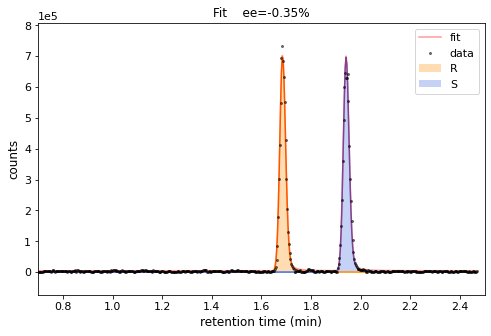

In [6]:
# if we label the peaks, the labels show up visually
c.peaks[0].label = "R"
c.peaks[1].label = "S"


fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show() 

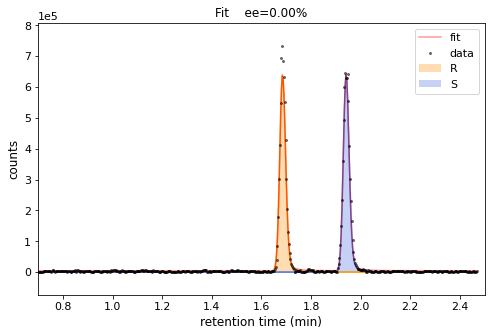

Fixed that for you


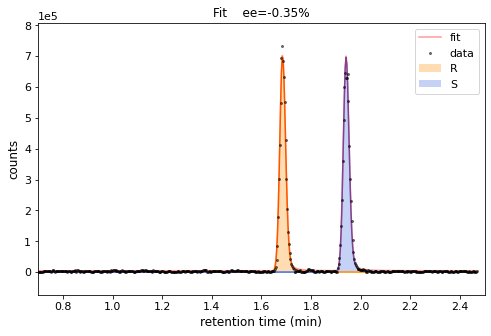

In [7]:
# demonstration of modification of peak parameters: everything updates!
c.peaks[0].params["amplitude"] = 0.01
c.peaks[1].params["amplitude"] = 0.01

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show() 

print("Fixed that for you")

c.fit_peaks(label=mass)

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show()